In [ ]:
import tensorflow as tf
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.layers import Add, Input, Dense, GlobalAveragePooling2D, MaxPooling2D, Flatten
from keras.utils import plot_model
from keras.datasets import cifar10
from keras.models import Model


In [ ]:
resnet = ResNet50()

102967424/102967424 [==============================] - 5s 0us/step


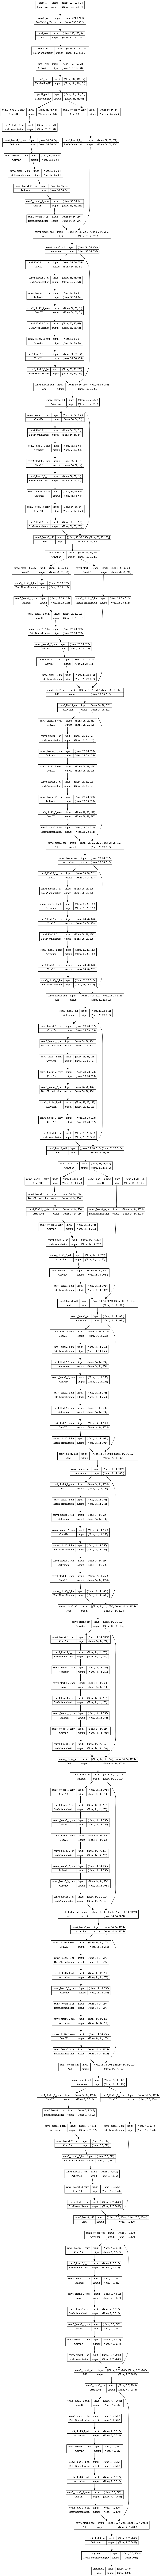

In [ ]:
plot_model(resnet, show_shapes=True, )

In [ ]:
resnet50 = ResNet50(include_top=False, weights='imagenet',input_shape = (32, 32, 3))

94765736/94765736 [==============================] - 5s 0us/step


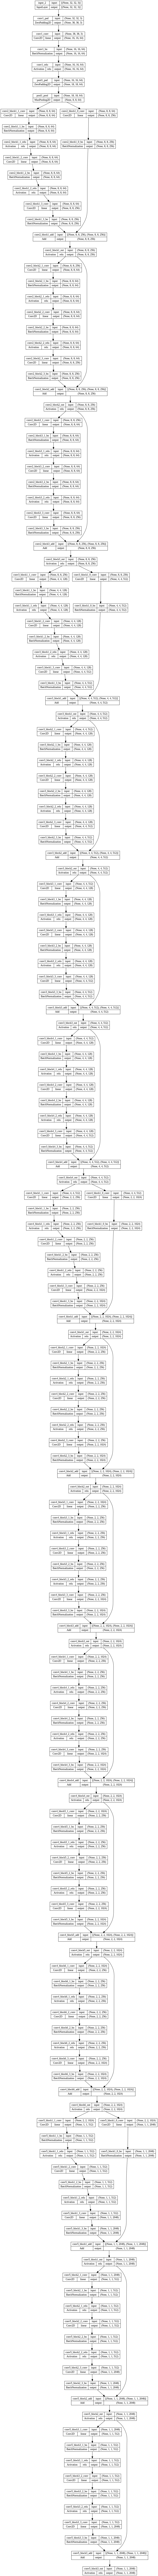

In [ ]:
plot_model(resnet50, show_shapes=True,show_layer_activations=True )

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
# Flatten output layer of Resnet
flattened = Flatten()(resnet50.output)

# Fully connected layer
fc1 = Dense(128, activation='relu', name = "AddedDense1")(flattened)

# Fully connected layer, output layer
fc2 = Dense(10, activation='sigmoid', name = "AddedDense2")(fc1)


In [18]:
resnet50.trainable = False

In [19]:
model = Model(inputs=resnet50.input, outputs=fc2)

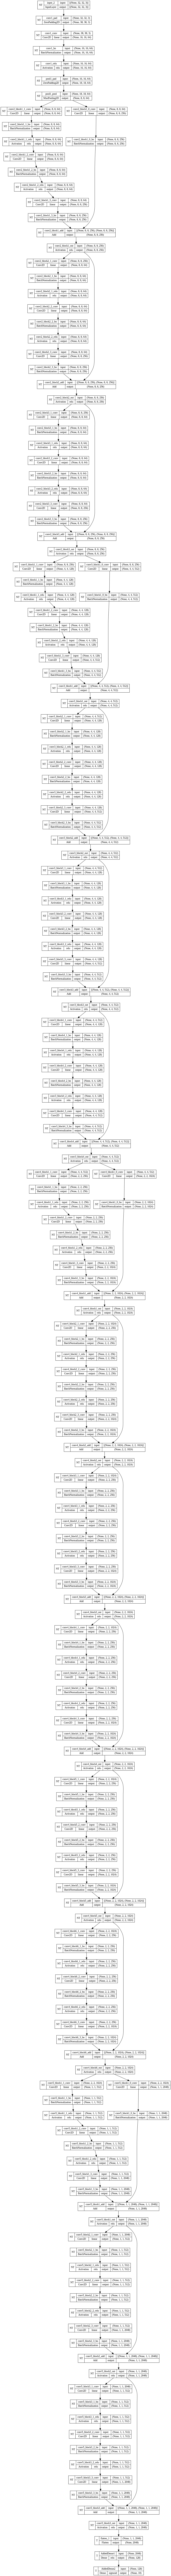

In [20]:
plot_model(model, show_shapes=True,show_layer_activations=True, show_trainable=True )

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 12ms/step - loss: 1.3064 - accuracy: 0.5490
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0697 - accuracy: 0.6216
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9958 - accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9366 - accuracy: 0.6659
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8818 - accuracy: 0.6872
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8335 - accuracy: 0.7032
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7840 - accuracy: 0.7184
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7425 - accuracy: 0.7356
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7033 - accuracy: 0.7490
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [28]:
resnet50.trainable = True

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 106s 46ms/step - loss: 1.5263 - accuracy: 0.4747
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.3074 - accuracy: 0.5445
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3678 - accuracy: 0.5173
Epoch 4/10
 707/1563 [============>.................] - ETA: 40s - loss: 1.3970 - accuracy: 0.5007

KeyboardInterrupt: 